In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


<Axes: xlabel='number'>

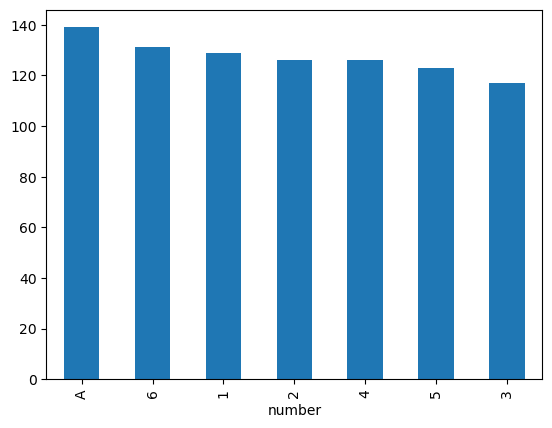

In [5]:
df['number'].value_counts().plot(kind='bar')

# Mixed Data Type2 (catergorical Numerical)

In [8]:
df['numerical_number'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')
df['catergorical_number'] = np.where(df['numerical_number'].isnull(),df['number'],np.nan)
df.head()

,Cabin,Ticket,number,Survived,numerical_number,catergorical_number
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [10]:
# finishing up columns by setting NaN values accordingly
df['numerical_number'] = np.where(df['numerical_number'].isnull(),0,df['numerical_number'])
df['catergorical_number'] = np.where(df['catergorical_number'].isnull(),'F',df['catergorical_number'])
df.head()

,Cabin,Ticket,number,Survived,numerical_number,catergorical_number
0,NaN,A/5 21171,5,0,5.0,F
1,C85,PC 17599,3,1,3.0,F
2,NaN,STON/O2. 3101282,6,1,6.0,F
3,C123,113803,3,1,3.0,F
4,NaN,373450,A,0,0.0,A


<Axes: xlabel='numerical_number'>

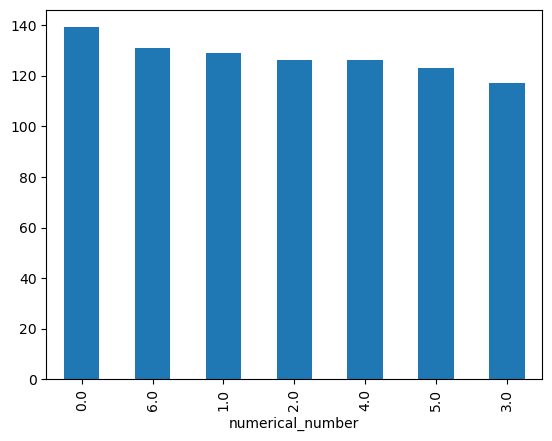

In [12]:
df['numerical_number'].value_counts().plot(kind='bar')

<Axes: xlabel='catergorical_number'>

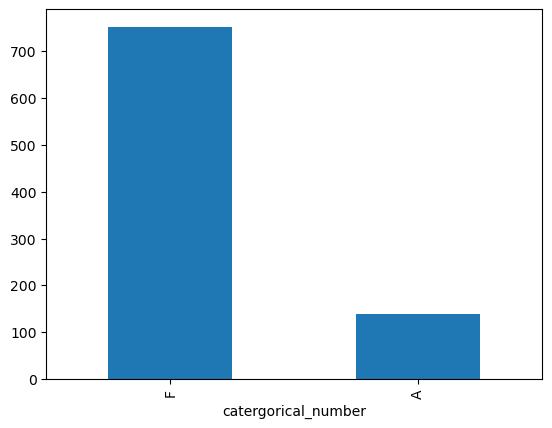

In [14]:
df['catergorical_number'].value_counts().plot(kind='bar')

# Mixed Data Type1 (catergorical Numerical)

In [17]:
df.head()

,Cabin,Ticket,number,Survived,numerical_number,catergorical_number
0,NaN,A/5 21171,5,0,5.0,F
1,C85,PC 17599,3,1,3.0,F
2,NaN,STON/O2. 3101282,6,1,6.0,F
3,C123,113803,3,1,3.0,F
4,NaN,373450,A,0,0.0,A


In [19]:
df['Cabin_cat'] = df['Cabin'].str[0]
df['Cabin_num'] = df['Cabin'].str.extract(r'(\d+)')

In [21]:
df.head()

,Cabin,Ticket,number,Survived,numerical_number,catergorical_number,Cabin_cat,Cabin_num
0,NaN,A/5 21171,5,0,5.0,F,NaN,NaN
1,C85,PC 17599,3,1,3.0,F,C,85
2,NaN,STON/O2. 3101282,6,1,6.0,F,NaN,NaN
3,C123,113803,3,1,3.0,F,C,123
4,NaN,373450,A,0,0.0,A,NaN,NaN


<Axes: xlabel='Cabin_cat'>

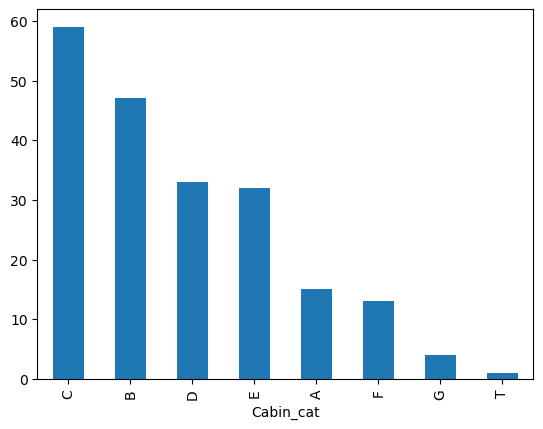

In [29]:
df['Cabin_cat'].value_counts().plot(kind='bar')

In [48]:
# extract first part of ticket as category
df['Ticket_cat'] = df['Ticket'].apply(lambda s : s.split()[0])
df['Ticket_cat'] = np.where(df['Ticket_cat'].str.isdigit(),np.nan,df['Ticket_cat'])

# extract second part of ticket as category
df['Ticket_num'] =df['Ticket'].apply(lambda s : s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'],errors='coerce',downcast='integer')

In [50]:
df.head()

,Cabin,Ticket,number,Survived,numerical_number,catergorical_number,Cabin_cat,Cabin_num,Ticket_cat,Ticket_num
0,NaN,A/5 21171,5,0,5.0,F,NaN,NaN,A/5,21171.0
1,C85,PC 17599,3,1,3.0,F,C,85,PC,17599.0
2,NaN,STON/O2. 3101282,6,1,6.0,F,NaN,NaN,STON/O2.,3101282.0
3,C123,113803,3,1,3.0,F,C,123,NaN,113803.0
4,NaN,373450,A,0,0.0,A,NaN,NaN,NaN,373450.0


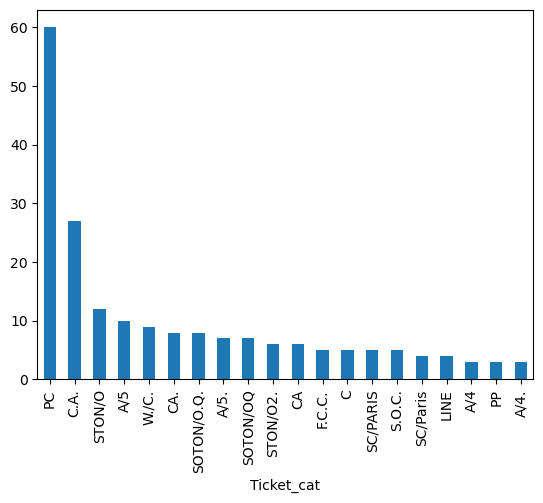

In [64]:
fig = df['Ticket_cat'].value_counts()[:20].plot(kind='bar')